In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='94a6855e-15fc-497f-b97c-f8e2d1dfdd14', project_access_token='p-8846519d6cde880d86421edcef8fccc37c22b035')
pc = project.project_context


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
df = project.get_file("4_Downloading Example Dataset_Data-Collisions.csv")
df.seek(0)
df = pd.read_csv(df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2> Data cleaning

In [4]:
df.drop(labels = 'PEDROWNOTGRNT', axis = 1, inplace = True)
df.drop(labels = 'EXCEPTRSNCODE', axis = 1, inplace = True)
df.drop(labels = 'INCDATE', axis = 1, inplace = True)

убираем строки, где нет х и у, потому что нам важно "Где и когда"

In [5]:
df1 = df.astype(object).replace(np.nan, 'None')
X = list(df1.X)
ind = list(range(len(X)+1))
ind_X = list(map(lambda i, x : [i,x], ind, X))
delet = [i[0] for i in ind_X if i[-1] == 'None']

In [6]:
df1.drop(df1.index[delet], inplace = True)

Убираем 2020 и 2019 года, потому что мало данных

In [7]:
dtime = list(df1.INCDTTM)
dttm = [i.split(' ') for i in dtime]
year = [i[0].split('/')[-1] for i in dttm]
amount_years = Counter(map(lambda x: x,  year))
print(amount_years)
ind = list(range(len(year) + 1))
year_ind = list(map(lambda i, y : [i,y], ind, year))
year_del = [i[0] for i in year_ind if i[-1] == '2020' or i[-1] == '2019']
df1.drop(df1.index[year_del], inplace = True)

Counter({'2006': 14816, '2005': 14760, '2007': 14036, '2008': 13170, '2015': 12434, '2004': 11568, '2014': 11486, '2016': 11325, '2009': 11312, '2012': 10616, '2011': 10602, '2017': 10578, '2010': 10533, '2013': 10314, '2018': 10224, '2019': 9334, '2020': 2231})


In [8]:
df1.drop(labels = 'SEVERITYCODE', axis = 1, inplace = True)

<h2>Features

In [9]:
df1.drop(labels = 'STATUS', axis = 1, inplace = True)
df1.drop(labels = 'EXCEPTRSNDESC', axis = 1, inplace = True)
df1.drop(labels = 'SDOTCOLNUM', axis = 1, inplace = True)
df1.drop(labels = 'HITPARKEDCAR', axis = 1, inplace = True)
df1.drop(labels = 'REPORTNO', axis = 1, inplace = True)
df.drop(labels = 'INCKEY', axis = 1, inplace = True)
df.drop(labels = 'COLDETKEY', axis = 1, inplace = True)
df.drop(labels = 'SDOT_COLCODE', axis = 1, inplace = True)
df.drop(labels = 'SDOT_COLDESC', axis = 1, inplace = True)

In [10]:
df1.dropna(axis = 0)

,X,Y,OBJECTID,INCKEY,COLDETKEY,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE.1,SEVERITYDESC,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY
0,-122.323,47.7031,1,1307,1307,Intersection,37475,5TH AVE NE AND NE 103RD ST,2,Injury Collision,...,None,N,Overcast,Wet,Daylight,None,10,Entering at angle,0,0
1,-122.347,47.6472,2,52200,52200,Block,None,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,...,None,0,Raining,Wet,Dark - Street Lights On,None,11,From same direction - both going straight - bo...,0,0
2,-122.335,47.6079,3,26700,26700,Block,None,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,...,None,0,Overcast,Dry,Daylight,None,32,One parked--one moving,0,0
3,-122.335,47.6048,4,1144,1144,Block,None,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,...,None,N,Clear,Dry,Daylight,None,23,From same direction - all others,0,0
4,-122.306,47.5457,5,17700,17700,Intersection,34387,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,...,None,0,Raining,Wet,Daylight,None,10,Entering at angle,0,0
6,-122.338,47.6185,7,83300,83300,Intersection,29510,DENNY WAY AND WESTLAKE AVE,1,Property Damage Only Collision,...,None,0,Raining,Wet,Daylight,None,10,Entering at angle,0,0
8,-122.336,47.6119,10,63400,63400,Block,None,PINE ST BETWEEN 5TH AVE AND 6TH AVE,1,Property Damage Only Collision,...,None,0,Clear,Dry,Daylight,None,32,One parked--one moving,0,0
9,-122.385,47.5285,12,58600,58600,Intersection,34679,41ST AVE SW AND SW THISTLE ST,2,Injury Collision,...,None,0,Clear,Dry,Daylight,None,10,Entering at angle,0,0
11,-122.334,47.5474,15,38800,38800,Intersection,33194,1ST AV S BR NB AND EAST MARGINAL WAY S,1,Property Damage Only Collision,...,None,0,Clear,Dry,Daylight,None,10,Entering at angle,0,0
12,-122.356,47.5714,16,2771,2771,Block,None,SW SPOKANE ST BETWEEN SW SPOKANE W BR AND TERM...,1,Property Damage Only Collision,...,None,0,Raining,Wet,Dark - Street Lights On,None,14,From same direction - both going straight - on...,0,0


<h2> Programming

In [11]:
def draw_bar(what, names, titl = '', ylab = ' '): 
        fig, ax = plt.subplots()
        graph = plt.bar(names, what, color = ['skyblue', 'darkseagreen', 'gold', 'firebrick'], width = 0.6)
        plt.title(titl)
        ax.set_ylabel(ylab)
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1 * height, '%d' % int(height), ha = 'center', va = 'bottom')
        autolabel(graph)
        plt.show()

<h3>Learning of places

                                                    Amount of Collisions
LOCATION                                                                
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORL...                   259
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                       239
6TH AVE AND JAMES ST                                                 230
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                       225
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLEL...                   217
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON ...                   185
AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N                           174
1ST AVE BETWEEN BLANCHARD ST AND BELL ST                             156
5TH AVE AND SPRING ST                                                153
RAINIER AVE S BETWEEN S HENDERSON ST AND S DIRE...                   142


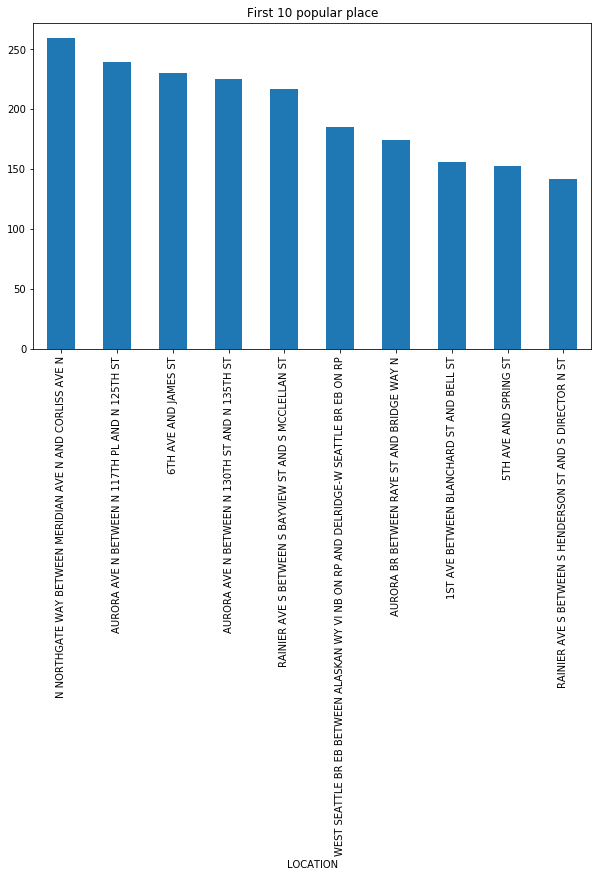

In [15]:
location = pd.DataFrame(data = df1.loc[:, 'LOCATION'], columns = ['LOCATION'])
location = location.groupby(['LOCATION']).size().reset_index(name = 'Amount of Collisions')
location = location.sort_values('Amount of Collisions', ascending = False)
location.drop(location.index[list(range(10, 23468))], inplace = True)
location = location.set_index('LOCATION')
print(location)
location.plot(kind='bar', y = 'Amount of Collisions', title = 'First 10 popular place', figsize = (10, 6), legend = False, fontsize = 10)
plt.show()

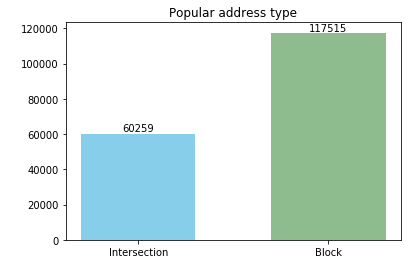

In [16]:
address = df1.ADDRTYPE
addr = Counter(map(lambda x: x,  address))
draw_bar(addr.values(), addr.keys(), 'Popular address type')
# alleys are out

<h3>Working with time

In [17]:
def time_check(df, dttm, am = 0, pm = 0, win = 0, sp = 0, su = 0, aut = 0):
    for i in dttm:
        if len(i) > 1:
            hour = int(i[1].split(':')[0])
            if hour >= 8 and i[-1] == 'AM':
                am += 1
            elif hour < 6 and i[-1] == 'PM':
                am += 1
            elif hour >= 6 and i[-1] == 'PM':
                pm += 1
            else:
                pm += 1
    month = [int(i[0].split('/')[0]) for i in dttm]
    for m in month:
        if m == 12 or m <= 2:
            win += 1
        elif m >= 3 and m <=5:
            sp += 1
        elif m >=6 and m <= 8:
            su += 1
        else:
            aut += 1
    return [am, pm], [win, sp, su, aut]

time, season = time_check(df1, dttm)

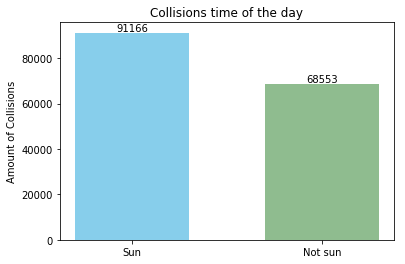

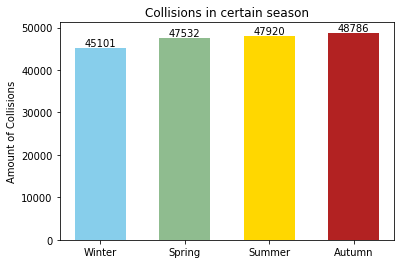

In [18]:
names = ['Sun', 'Not sun']
names_2 = ['Winter', 'Spring', 'Summer', 'Autumn']
draw_bar(time, names, 'Collisions time of the day', 'Amount of Collisions')  
draw_bar(season, names_2, 'Collisions in certain season', 'Amount of Collisions')  

<h3> Severity

In [19]:
print('---', 'SEVERITYDESC', '\n', df1.SEVERITYDESC.value_counts())

--- SEVERITYDESC 
 Property Damage Only Collision    124383
Injury Collision                   53391
Name: SEVERITYDESC, dtype: int64


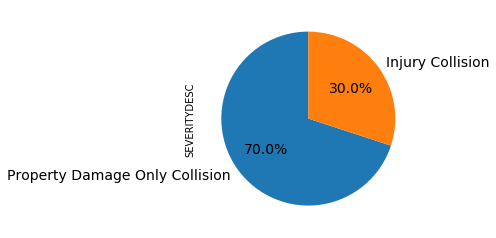

In [20]:
severity = pd.DataFrame(df1.SEVERITYDESC.value_counts())
severity.plot(kind='pie', y = 'SEVERITYDESC', autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)
plt.show()
# severity

<h3> Reasons

There are INATTENTIONIND	UNDERINFL	WEATHER	ROADCOND	LIGHTCOND	SPEEDING

1. INATTENTIONIND

In [21]:
inatt = list(df1.loc[:, 'INATTENTIONIND'])
for i in list(range(len(inatt))):
    if inatt[i] != 'Y':
        inatt[i] = 'No'
    else:
        inatt[i] = 'Yes'
df1['INATTENTIONIND'] = inatt
print('Inattentionind', '\n', df1.INATTENTIONIND.value_counts())

Inattentionind 
 No     150479
Yes     27295
Name: INATTENTIONIND, dtype: int64


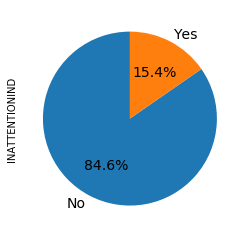

In [22]:
inattention = pd.DataFrame(df1.INATTENTIONIND.value_counts())
inattention.plot(kind='pie', y = 'INATTENTIONIND', autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize=14)
plt.show()

2. UNDERINFL

In [23]:
under = list(df1.loc[:, 'UNDERINFL'])
for i in list(range(len(under))):
    if under[i] == 'N' or under[i] == '0':
        under[i] = 'No'
    elif under[i] == 'None':
        under[i] == 'Unknown'
    else:
        under[i] = 'Yes'
df1['UNDERINFL'] = under
print('UnderInfl', '\n', df1.UNDERINFL.value_counts())

UnderInfl 
 No      166320
Yes       8358
None      3096
Name: UNDERINFL, dtype: int64


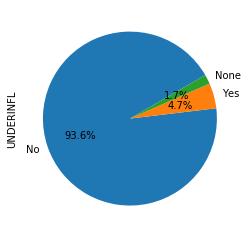

In [24]:
underinfl= pd.DataFrame(df1.UNDERINFL.value_counts())
underinfl.plot(kind='pie', y = 'UNDERINFL', autopct='%1.1f%%', startangle = 30, shadow = False, legend = False, fontsize = 10)
plt.show()

3. WEATHER

                          Amount of weather kinds
WEATHER                                          
Severe Crosswind                               22
Blowing Sand/Dirt                              38
Sleet/Hail/Freezing Rain                      106
Fog/Smog/Smoke                                540
Other                                         720
Snowing                                       796
None                                         3256
Unknown                                     13660
Overcast                                    25630
Raining                                     30453
Clear                                      102553
          Amount of weather kinds
WEATHER                          
Snowing                       796
Other                        1426
Unknown                     16916
Overcast                    25630
Raining                     30453
Clear                      102553


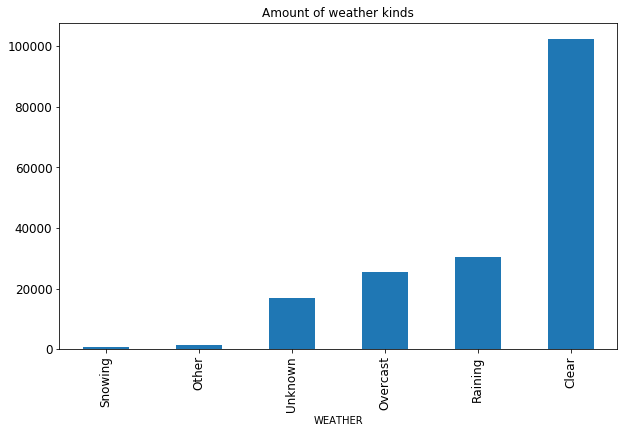

In [25]:
weather = pd.DataFrame(data = df1.loc[:, 'WEATHER'], columns = ['WEATHER'])
weather = weather.groupby(['WEATHER']).size().reset_index(name = 'Amount of weather kinds')
weather = weather.sort_values('Amount of weather kinds', ascending = True)
weather = weather.set_index('WEATHER')
print(weather)
weather.loc['Other'] = weather.iloc[:5,:].sum()
weather.loc['Unknown'] = weather.iloc[6:8,:].sum()
weather.drop(weather.index[[0, 1, 2, 3, 6]], inplace = True)
weather = weather.sort_values('Amount of weather kinds', ascending = True)
print(weather)
weather.plot(kind='bar', y = 'Amount of weather kinds', title = 'Amount of weather kinds', figsize = (10, 6), legend = False, fontsize = 12)
plt.show()

4. ROADCOND

                Amount of road conditions
ROADCOND                                 
Oil                                    49
Sand/Mud/Dirt                          62
Standing Water                         98
Other                                 104
Snow/Slush                            900
Ice                                  1090
None                                 3206
Unknown                             13550
Wet                                 43618
Dry                                115097
            Amount of road conditions
ROADCOND                             
Other                             313
Snow/Slush                        900
Ice                              1090
Unknown                         16756
Wet                             43618
Dry                            115097


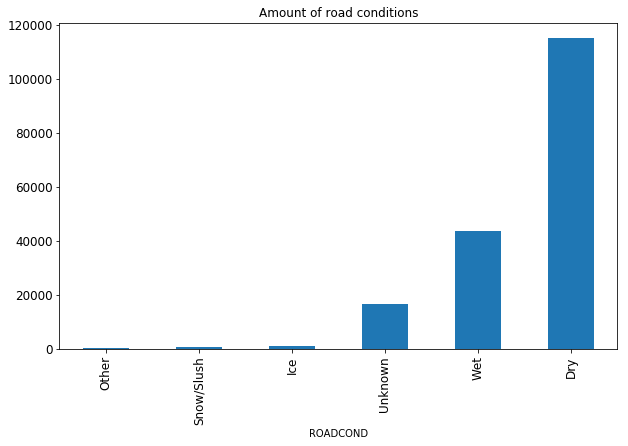

In [26]:
road = pd.DataFrame(data = df1.loc[:, 'ROADCOND'], columns = ['ROADCOND'])
road = road.groupby(['ROADCOND']).size().reset_index(name = 'Amount of road conditions')
road = road.sort_values('Amount of road conditions', ascending = True)
road = road.set_index('ROADCOND')
print(road)
road.loc['Other'] = road.iloc[:4,:].sum()
road.loc['Unknown'] = road.iloc[6:8,:].sum()
road.drop(road.index[[0, 1, 2, 6]], inplace = True)
road = road.sort_values('Amount of road conditions', ascending = True)
print(road)
road.plot(kind='bar', y = 'Amount of road conditions', title = 'Amount of road conditions', figsize = (10, 6), legend = False, fontsize = 12)
plt.show()

5. LIGHTCOND

                          Amount of light conditions
LIGHTCOND                                           
Other                                            172
Dark - Street Lights Off                        1102
Dark - No Street Lights                         1364
Dawn                                            2265
None                                            3347
Dusk                                            5460
Unknown                                        12195
Dark - Street Lights On                        44734
Daylight                                      107135
                          Amount of light conditions
LIGHTCOND                                           
Dark - Street Lights Off                        1102
Dark - No Street Lights                         1364
Dawn                                            2265
Dusk                                            5460
Other                                          15714
Dark - Street Lights On                       

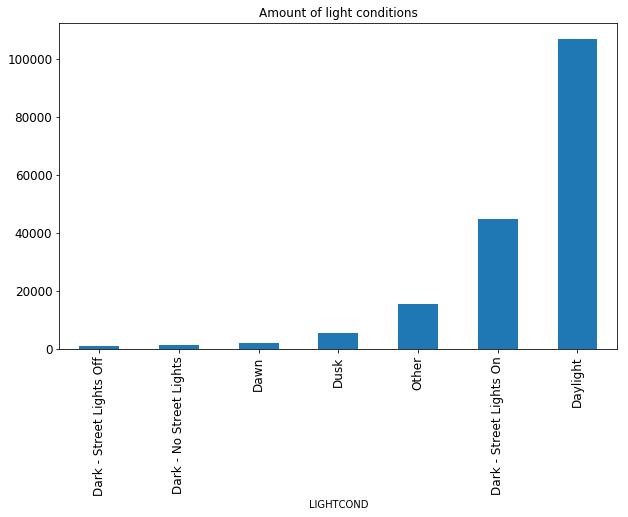

In [27]:
light = pd.DataFrame(data = df1.loc[:, 'LIGHTCOND'], columns = ['LIGHTCOND'])
light = light.groupby(['LIGHTCOND']).size().reset_index(name = 'Amount of light conditions')
light = light.sort_values('Amount of light conditions', ascending = True)
light = light.set_index('LIGHTCOND')
print(light)
light.loc['Other'] = light.iloc[[0, 4, 6],:].sum()
light.drop(light.index[[4, 6]], inplace = True)
light = light.sort_values('Amount of light conditions', ascending = True)
print(light)
light.plot(kind='bar', y = 'Amount of light conditions', title = 'Amount of light conditions', figsize = (10, 6), legend = False, fontsize = 12)
plt.show()

6. SPEEDING

In [28]:
speed = list(df1.loc[:, 'SPEEDING'])
for i in list(range(len(inatt))):
    if speed[i] != 'Y':
        speed[i] = 'No'
    else:
        speed[i] = 'Yes'
df1['SPEEDING'] = speed
print('Using of speed', '\n', df1.SPEEDING.value_counts())

Using of speed 
 No     169463
Yes      8311
Name: SPEEDING, dtype: int64


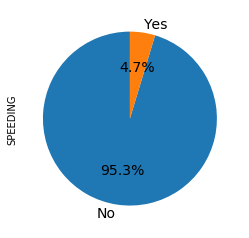

In [29]:
speeding = pd.DataFrame(df1.SPEEDING.value_counts())
speeding.plot(kind='pie', y = 'SPEEDING', autopct='%1.1f%%', startangle=90, shadow=False, legend = False, fontsize = 14)
plt.show()

<h2> Paticipants

             Amount of involved people
PERSONCOUNT                           
8                                  507
7                                 1050
6                                 2532
0                                 5442
5                                 6158
1                                11194
4                                13547
3                                32833
2                               103965


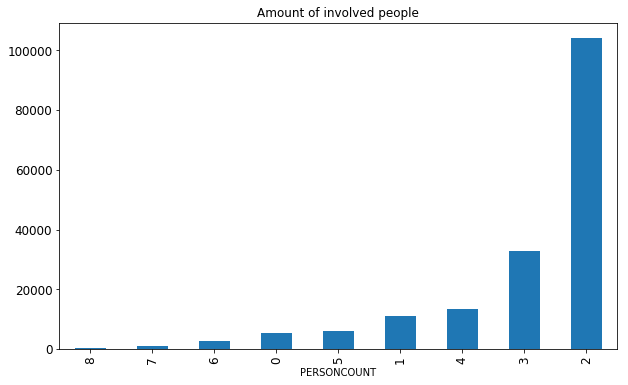

In [31]:
person = pd.DataFrame(data = df1.loc[:, 'PERSONCOUNT'], columns = ['PERSONCOUNT'])
person = person.groupby(['PERSONCOUNT']).size().reset_index(name = 'Amount of involved people')
person = person.sort_values('Amount of involved people', ascending = False)
person = person.set_index('PERSONCOUNT')
# print(person)
person.drop(person.index[[range(9,47)]], inplace = True)
person = person.sort_values('Amount of involved people', ascending = True)
print(person)
person.plot(kind='bar', y = 'Amount of involved people', title = 'Amount of involved people', figsize = (10, 6), legend = False, fontsize = 12)
plt.show()

In [32]:
pedestrian = pd.DataFrame(df1.PEDCOUNT.value_counts())
print(pedestrian)
print('The', int(pedestrian.iloc[1:6].sum()), 'pedestrians were involved in all collisions ')

   PEDCOUNT
0    171411
1      6129
2       211
3        18
4         3
6         1
5         1
The 6362 pedestrians were involved in all collisions 


In [33]:
bicycles = pd.DataFrame(df1.PEDCYLCOUNT.value_counts())
print(bicycles)
print('The', int(bicycles.iloc[1:3].sum()), 'bicycles were involved in all collisions ')

   PEDCYLCOUNT
0       172719
1         5012
2           43
The 5055 bicycles were involved in all collisions 


In [34]:
vehicles = pd.DataFrame(df1.VEHCOUNT.value_counts())
print(vehicles)
print('The', int(vehicles.iloc[[0,1,2,4,5,6,7,8,9,10,11,12]].sum()), 'vehicles were involved in all collisions ')

    VEHCOUNT
2     136639
1      22922
3      11997
0       3287
4       2240
5        482
6        137
7         39
8         15
9          8
11         5
10         2
12         1
The 174487 vehicles were involved in all collisions 
